# Compare cytominer profiles to pycytominer profiles

**Gregory Way, 2019**

In [1]:
import os
import pandas as pd
from sklearn.metrics import mean_squared_error
import plotnine as gg

In [2]:
%matplotlib inline

## Load Profiles

### 1) Profiles processed using cytominer

In [3]:
plate = "SQ00014612"

cyto_file = os.path.join("profiles", "{}_normalized_variable_selected.csv".format(plate))
cyto_df = pd.read_csv(cyto_file)

print(cyto_df.shape)
cyto_df.head(2)

(384, 262)


,Metadata_Plate,Metadata_Well,Metadata_Assay_Plate_Barcode,Metadata_Plate_Map_Name,Metadata_well_position,Metadata_WellRow,Metadata_WellCol,Metadata_gene_name,Metadata_pert_name,Metadata_broad_sample,...,Nuclei_Texture_InverseDifferenceMoment_AGP_10_0,Nuclei_Texture_InverseDifferenceMoment_AGP_5_0,Nuclei_Texture_InverseDifferenceMoment_DNA_5_0,Nuclei_Texture_InverseDifferenceMoment_Mito_5_0,Nuclei_Texture_SumAverage_AGP_5_0,Nuclei_Texture_SumAverage_DNA_20_0,Nuclei_Texture_SumAverage_ER_5_0,Nuclei_Texture_SumEntropy_RNA_20_0,Nuclei_Texture_Variance_ER_20_0,Nuclei_Texture_Variance_Mito_20_0
0,SQ00014612,A01,SQ00014612,DEPENDENCIES1_A549,A01,A,1,EMPTY,EMPTY,NaN,...,-3.158583,-2.578170,-2.952342,-2.531712,2.697008,-2.409535,2.591171,-0.384994,1.345250,0.588665
1,SQ00014612,A02,SQ00014612,DEPENDENCIES1_A549,A02,A,2,MCL1,MCL1-5,NaN,...,-3.029468,-2.559676,-2.683779,-2.454803,2.428036,-2.486738,2.318066,-0.459269,1.261257,0.859421


### 2) Profiles processed using pycytominer

In [4]:
batch = "CRISPR_PILOT_B1"
pycyto_base = os.path.join("..", "..", "1.generate-profiles", "data", "profiles", batch, plate)
pycyto_file = os.path.join(pycyto_base, "{}_normalized_feature_select.csv.gz".format(plate))
pycyto_df = pd.read_csv(pycyto_file).rename({"Image_Metadata_Plate": "Metadata_Plate",
                                             "Image_Metadata_Well": "Metadata_Well"},
                                            axis='columns')

print(pycyto_df.shape)
pycyto_df.head(2)

(384, 1307)


,Metadata_WellRow,Metadata_WellCol,Metadata_gene_name,Metadata_pert_name,Metadata_broad_sample,Metadata_cell_line,Metadata_Plate,Metadata_Well,Cells_AreaShape_Area,Cells_AreaShape_Center_X,...,Nuclei_Texture_Variance_DNA_5_0,Nuclei_Texture_Variance_ER_10_0,Nuclei_Texture_Variance_ER_20_0,Nuclei_Texture_Variance_ER_5_0,Nuclei_Texture_Variance_Mito_10_0,Nuclei_Texture_Variance_Mito_20_0,Nuclei_Texture_Variance_Mito_5_0,Nuclei_Texture_Variance_RNA_10_0,Nuclei_Texture_Variance_RNA_20_0,Nuclei_Texture_Variance_RNA_5_0
0,A,1,EMPTY,EMPTY,NaN,A549,SQ00014612,A01,-1.353599,0.035646,...,0.645436,2.152081,1.407952,2.431199,1.111095,0.751802,1.03875,0.628096,-0.086664,1.051311
1,A,2,MCL1,MCL1-5,NaN,A549,SQ00014612,A02,-1.208910,1.916632,...,0.373770,2.192057,1.316595,2.230931,1.266230,1.026208,1.12168,0.862257,0.165791,1.115319


## Subset CellProfiler Features

In [5]:
meta_cols = ["Metadata_Plate", "Metadata_Well", "Metadata_gene_name", "Metadata_pert_name"]
cp_features = meta_cols + [
    x for x in cyto_df.columns if
    (x.startswith("Cells_") or x.startswith("Nuclei_") or x.startswith("Cytoplasm_"))
]

len(cp_features)

248

In [6]:
cyto_df = (
    cyto_df
    .reindex(cp_features, axis="columns")
    .sort_values(by="Metadata_Well")
    .assign(Metadata_Package="cytominer")
)
cyto_df.head(2)

,Metadata_Plate,Metadata_Well,Metadata_gene_name,Metadata_pert_name,Cells_AreaShape_Solidity,Cells_AreaShape_Zernike_2_0,Cells_AreaShape_Zernike_2_2,Cells_AreaShape_Zernike_4_2,Cells_AreaShape_Zernike_4_4,Cells_Correlation_Correlation_DNA_ER,...,Nuclei_Texture_InverseDifferenceMoment_AGP_5_0,Nuclei_Texture_InverseDifferenceMoment_DNA_5_0,Nuclei_Texture_InverseDifferenceMoment_Mito_5_0,Nuclei_Texture_SumAverage_AGP_5_0,Nuclei_Texture_SumAverage_DNA_20_0,Nuclei_Texture_SumAverage_ER_5_0,Nuclei_Texture_SumEntropy_RNA_20_0,Nuclei_Texture_Variance_ER_20_0,Nuclei_Texture_Variance_Mito_20_0,Metadata_Package
0,SQ00014612,A01,EMPTY,EMPTY,0.844261,-0.595519,1.927228,-0.952571,0.683622,-0.384735,...,-2.578170,-2.952342,-2.531712,2.697008,-2.409535,2.591171,-0.384994,1.345250,0.588665,cytominer
1,SQ00014612,A02,MCL1,MCL1-5,0.640362,-2.128999,2.376525,0.625573,0.570981,-0.084231,...,-2.559676,-2.683779,-2.454803,2.428036,-2.486738,2.318066,-0.459269,1.261257,0.859421,cytominer


In [7]:
pycyto_df = (
    pycyto_df
    .reindex(cp_features, axis="columns")
    .sort_values(by="Metadata_Well")
    .assign(Metadata_Package="pycytominer")
)
pycyto_df.head(2)

,Metadata_Plate,Metadata_Well,Metadata_gene_name,Metadata_pert_name,Cells_AreaShape_Solidity,Cells_AreaShape_Zernike_2_0,Cells_AreaShape_Zernike_2_2,Cells_AreaShape_Zernike_4_2,Cells_AreaShape_Zernike_4_4,Cells_Correlation_Correlation_DNA_ER,...,Nuclei_Texture_InverseDifferenceMoment_AGP_5_0,Nuclei_Texture_InverseDifferenceMoment_DNA_5_0,Nuclei_Texture_InverseDifferenceMoment_Mito_5_0,Nuclei_Texture_SumAverage_AGP_5_0,Nuclei_Texture_SumAverage_DNA_20_0,Nuclei_Texture_SumAverage_ER_5_0,Nuclei_Texture_SumEntropy_RNA_20_0,Nuclei_Texture_Variance_ER_20_0,Nuclei_Texture_Variance_Mito_20_0,Metadata_Package
0,SQ00014612,A01,EMPTY,EMPTY,0.994138,-0.615548,1.837651,-0.898109,0.672509,NaN,...,-2.854176,-2.226981,-2.184527,2.852568,-1.849205,1.966906,-0.556571,1.407952,0.751802,pycytominer
1,SQ00014612,A02,MCL1,MCL1-5,0.767698,-1.852913,2.271075,0.659037,0.555433,NaN,...,-2.832986,-2.023215,-2.118009,2.555640,-1.908841,1.747763,-0.631522,1.316595,1.026208,pycytominer


In [8]:
meta_cols = meta_cols + ["Metadata_Package"]

df = pd.concat([cyto_df, pycyto_df]).reset_index(drop=True)

print(df.shape)
df.head(2)

(768, 249)


,Metadata_Plate,Metadata_Well,Metadata_gene_name,Metadata_pert_name,Cells_AreaShape_Solidity,Cells_AreaShape_Zernike_2_0,Cells_AreaShape_Zernike_2_2,Cells_AreaShape_Zernike_4_2,Cells_AreaShape_Zernike_4_4,Cells_Correlation_Correlation_DNA_ER,...,Nuclei_Texture_InverseDifferenceMoment_AGP_5_0,Nuclei_Texture_InverseDifferenceMoment_DNA_5_0,Nuclei_Texture_InverseDifferenceMoment_Mito_5_0,Nuclei_Texture_SumAverage_AGP_5_0,Nuclei_Texture_SumAverage_DNA_20_0,Nuclei_Texture_SumAverage_ER_5_0,Nuclei_Texture_SumEntropy_RNA_20_0,Nuclei_Texture_Variance_ER_20_0,Nuclei_Texture_Variance_Mito_20_0,Metadata_Package
0,SQ00014612,A01,EMPTY,EMPTY,0.844261,-0.595519,1.927228,-0.952571,0.683622,-0.384735,...,-2.578170,-2.952342,-2.531712,2.697008,-2.409535,2.591171,-0.384994,1.345250,0.588665,cytominer
1,SQ00014612,A02,MCL1,MCL1-5,0.640362,-2.128999,2.376525,0.625573,0.570981,-0.084231,...,-2.559676,-2.683779,-2.454803,2.428036,-2.486738,2.318066,-0.459269,1.261257,0.859421,cytominer


In [9]:
cp_df = df.drop(meta_cols, axis="columns")
meta_df = df.drop(cp_df.columns, axis="columns")
meta_df = meta_df.assign(meta_id = meta_df.Metadata_Well + "_" + meta_df.Metadata_Package)

In [10]:
cp_cor_df = cp_df.transpose().corr()
cp_cor_df = cp_cor_df.where(pd.np.tril(pd.np.ones(cp_cor_df.shape), k=-1).astype(bool))

cp_cor_df.index = meta_df.Metadata_Well + "_" + meta_df.Metadata_Package
cp_cor_df.columns = meta_df.Metadata_Well + "_" + meta_df.Metadata_Package
cp_cor_df = cp_cor_df.stack().reset_index().rename({"level_0": "a", "level_1": "b", 0: "correlation"},
                                                   axis='columns')

print(cp_cor_df.shape)
cp_cor_df.head(2)

(294528, 3)


,a,b,correlation
0,A02_cytominer,A01_cytominer,0.947691
1,A03_cytominer,A01_cytominer,0.582801


In [11]:
full_df = (
    cp_cor_df
    .merge(meta_df,
           left_on="a",
           right_on="meta_id")
    .merge(meta_df,
           left_on="b",
           right_on="meta_id",
           suffixes=["", "_b"])
    .drop(["Metadata_Plate", "Metadata_Plate_b",
           "meta_id", "meta_id_b"], axis="columns")
)

full_df = full_df.assign(
    across_package=full_df.Metadata_Well == full_df.Metadata_Well_b,
    across_package_gene=(
        (full_df.Metadata_Package != full_df.Metadata_Package_b) &
        (full_df.Metadata_gene_name == full_df.Metadata_gene_name_b) &
        (full_df.Metadata_Well != full_df.Metadata_Well_b)
    ),
    within_package_gene=(
        (full_df.Metadata_Package == full_df.Metadata_Package_b) &
        (full_df.Metadata_gene_name == full_df.Metadata_gene_name_b)
    )
)

full_df.loc[full_df.across_package_gene == True, "across_package"] = "Same Gene Across Package"
full_df.loc[full_df.within_package_gene == True, "across_package"] = "Same Gene Within Package"
full_df.loc[full_df.across_package == True, "across_package"] = "Same Well Across Package"
full_df.loc[full_df.across_package == False, "across_package"] = "Different Well"

print(full_df.shape)
full_df.head(2)

(294528, 14)


,a,b,correlation,Metadata_Well,Metadata_gene_name,Metadata_pert_name,Metadata_Package,Metadata_Well_b,Metadata_gene_name_b,Metadata_pert_name_b,Metadata_Package_b,across_package,across_package_gene,within_package_gene
0,A02_cytominer,A01_cytominer,0.947691,A02,MCL1,MCL1-5,cytominer,A01,EMPTY,EMPTY,cytominer,Different Well,False,False
1,A03_cytominer,A01_cytominer,0.582801,A03,AKT1,AKT1-1,cytominer,A01,EMPTY,EMPTY,cytominer,Different Well,False,False


## Visualize Correlation Distribution

/Users/gway/miniconda3/envs/cell-health/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 5 x 5 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/cell-health/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: compare_cytominer_pycytominer_pearson.png
  warn('Filename: {}'.format(filename))


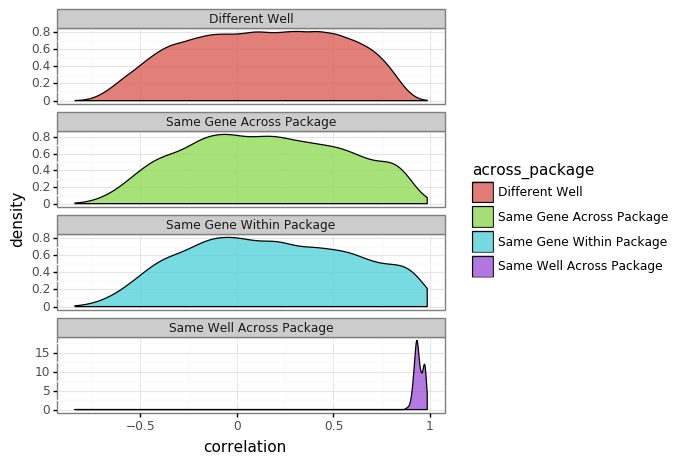

<ggplot: (-9223372036546875830)>

In [12]:
cor_gg = gg.ggplot(full_df, gg.aes(x="correlation")) + \
    gg.geom_density(gg.aes(fill="across_package"), alpha=0.8) + \
    gg.theme_bw() + \
    gg.scale_fill_discrete(name="") + \
    gg.facet_wrap("across_package", scales='free_y', nrow=4)

fig_file = os.path.join("compare_cytominer_pycytominer_pearson.png")
cor_gg.save(filename=fig_file, dpi=300, width=5, height=5)

cor_gg

## Calculate pairwise MSE

In [13]:
all_mse_list = []
n = df.shape[0]
for i in range(0, n):
    for j in range(0, n):
        a = meta_df.iloc[i, :].rename('{}_a'.format)
        b = meta_df.iloc[j, :].rename('{}_b'.format)
        mse_result = mean_squared_error(cp_df.iloc[i, :].fillna(0), cp_df.iloc[j, :].fillna(0))
        all_mse_list.append(pd.concat([a, b, pd.Series(mse_result, index=["mse"])]))

In [14]:
all_mse_df = pd.concat(all_mse_list, axis="columns").transpose()

print(all_mse_df.shape)
all_mse_df.head()

(589824, 13)


,Metadata_Plate_a,Metadata_Well_a,Metadata_gene_name_a,Metadata_pert_name_a,Metadata_Package_a,meta_id_a,Metadata_Plate_b,Metadata_Well_b,Metadata_gene_name_b,Metadata_pert_name_b,Metadata_Package_b,meta_id_b,mse
0,SQ00014612,A01,EMPTY,EMPTY,cytominer,A01_cytominer,SQ00014612,A01,EMPTY,EMPTY,cytominer,A01_cytominer,0
1,SQ00014612,A01,EMPTY,EMPTY,cytominer,A01_cytominer,SQ00014612,A02,MCL1,MCL1-5,cytominer,A02_cytominer,0.269173
2,SQ00014612,A01,EMPTY,EMPTY,cytominer,A01_cytominer,SQ00014612,A03,AKT1,AKT1-1,cytominer,A03_cytominer,1.75546
3,SQ00014612,A01,EMPTY,EMPTY,cytominer,A01_cytominer,SQ00014612,A04,KRAS,KRAS-2B,cytominer,A04_cytominer,3.41091
4,SQ00014612,A01,EMPTY,EMPTY,cytominer,A01_cytominer,SQ00014612,A05,AKT1,AKT1-2,cytominer,A05_cytominer,0.925984


In [15]:
all_mse_df = all_mse_df.assign(
    across_package=all_mse_df.Metadata_Well_a == all_mse_df.Metadata_Well_b,
    across_package_gene=(
        (all_mse_df.Metadata_Package_a != all_mse_df.Metadata_Package_b) &
        (all_mse_df.Metadata_gene_name_a == all_mse_df.Metadata_gene_name_b) &
        (all_mse_df.Metadata_Well_a != all_mse_df.Metadata_Well_b)
    ),
    within_package_gene=(
        (all_mse_df.Metadata_Package_a == all_mse_df.Metadata_Package_b) &
        (all_mse_df.Metadata_gene_name_a == all_mse_df.Metadata_gene_name_b)
    )
)

all_mse_df.loc[all_mse_df.across_package_gene == True, "across_package"] = "Same Gene Across Package"
all_mse_df.loc[all_mse_df.within_package_gene == True, "across_package"] = "Same Gene Within Package"
all_mse_df.loc[all_mse_df.across_package == True, "across_package"] = "Same Well Across Package"
all_mse_df.loc[all_mse_df.across_package == False, "across_package"] = "Different Well"

all_mse_df.mse = all_mse_df.mse.astype(float)
all_mse_df.across_package = all_mse_df.across_package.astype(str)

all_mse_df = all_mse_df.drop_duplicates(subset=["mse"])

print(all_mse_df.shape)
all_mse_df.head()

(294529, 16)


,Metadata_Plate_a,Metadata_Well_a,Metadata_gene_name_a,Metadata_pert_name_a,Metadata_Package_a,meta_id_a,Metadata_Plate_b,Metadata_Well_b,Metadata_gene_name_b,Metadata_pert_name_b,Metadata_Package_b,meta_id_b,mse,across_package,across_package_gene,within_package_gene
0,SQ00014612,A01,EMPTY,EMPTY,cytominer,A01_cytominer,SQ00014612,A01,EMPTY,EMPTY,cytominer,A01_cytominer,0.000000,Same Gene Within Package,False,True
1,SQ00014612,A01,EMPTY,EMPTY,cytominer,A01_cytominer,SQ00014612,A02,MCL1,MCL1-5,cytominer,A02_cytominer,0.269173,Different Well,False,False
2,SQ00014612,A01,EMPTY,EMPTY,cytominer,A01_cytominer,SQ00014612,A03,AKT1,AKT1-1,cytominer,A03_cytominer,1.755460,Different Well,False,False
3,SQ00014612,A01,EMPTY,EMPTY,cytominer,A01_cytominer,SQ00014612,A04,KRAS,KRAS-2B,cytominer,A04_cytominer,3.410910,Different Well,False,False
4,SQ00014612,A01,EMPTY,EMPTY,cytominer,A01_cytominer,SQ00014612,A05,AKT1,AKT1-2,cytominer,A05_cytominer,0.925984,Different Well,False,False


/Users/gway/miniconda3/envs/cell-health/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 5 x 5 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/cell-health/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: compare_cytominer_pycytominer_mse.png
  warn('Filename: {}'.format(filename))
/Users/gway/miniconda3/envs/cell-health/lib/python3.7/site-packages/plotnine/layer.py:360: UserWarning: stat_density : Removed 50469 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/Users/gway/miniconda3/envs/cell-health/lib/python3.7/site-packages/plotnine/layer.py:360: UserWarning: stat_density : Removed 50469 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


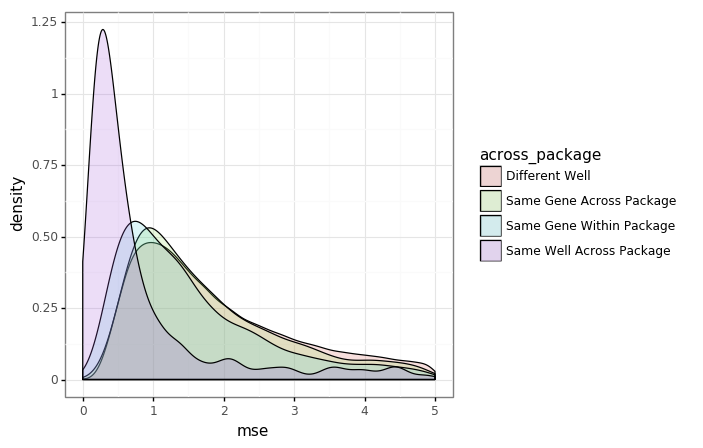

<ggplot: (-9223372036546661302)>

In [16]:
mse_gg = gg.ggplot(all_mse_df, gg.aes(x="mse")) + \
    gg.geom_density(gg.aes(fill="across_package"), alpha=0.2) + \
    gg.theme_bw() + \
    gg.scale_fill_discrete(name="") + \
    gg.xlim([0, 5])

fig_file = os.path.join("compare_cytominer_pycytominer_mse.png")
mse_gg.save(filename=fig_file, dpi=300, width=5, height=5)

mse_gg